In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
path = r"C:\Users\Abhilash\Desktop\Data Trained\Flip Robo\Dataset\Car Price Prediction\webscraped_allcars.xlsx"

In [3]:
data = pd.read_excel(path)
data.head()

,Unnamed,Exrtracted,Website,Name,mileage,Dealer_name,Rating,Review_count,Price,Year,Company,Model,Model#,Gear,Fuel,Dollar removed,Price_INR,Mileage,Mileage_in_km
0,0,2021-11-09,www.cars.com,2020 Toyota Tacoma TRD Sport,"9,950 mi.",AutoNation Toyota Spokane Valley,4.6,546,"$45,740",2020,Toyota,Tacoma,TRD Sport,Manual,Diesel,"45,740",3201800.0,"9,950",6182.658730
1,1,2021-11-09,www.cars.com,2017 Toyota Corolla LE,"93,809 mi.",J&S Autohaus III,3.6,13,"$14,495",2017,Toyota,Corolla,LE,Auto,Diesel,"14,495",1014650.0,"93,809",58290.355052
2,2,2021-11-09,www.cars.com,2008 Toyota Sienna XLE,"116,025 mi.",AGN Auto Gallery,3.6,93,"$9,890",2008,Toyota,Sienna,XLE,Manual,Diesel,"9,890",692300.0,"116,025",72094.771770
3,3,2021-11-09,www.cars.com,2018 Toyota RAV4 Hybrid XLE,"34,692 mi.",Toyota of Lincolnwood,4.1,555,"$29,599",2018,Toyota,RAV4,Hybrid XLE,Auto,Diesel,"29,599",2071930.0,"34,692",21556.662980
4,4,2021-11-09,www.cars.com,2013 Toyota Prius c Four,"92,634 mi.",Carizona,3.9,67,"$12,999",2013,Toyota,Prius,c Four,Manual,Diesel,"12,999",909930.0,"92,634",57560.242087


In [4]:
data.shape


(7472, 19)

In [5]:
data.dtypes

Unnamed                    int64
Exrtracted        datetime64[ns]
Website                   object
Name                      object
mileage                   object
Dealer_name               object
Rating                   float64
Review_count              object
Price                     object
Year                       int64
Company                   object
Model                     object
Model#                    object
Gear                      object
Fuel                      object
Dollar removed            object
Price_INR                float64
Mileage                   object
Mileage_in_km            float64
dtype: object

In [6]:
#We see we are having,integer,datetype,float and strings

In [7]:
data.isnull().sum()

Unnamed             0
Exrtracted          0
Website             0
Name                0
mileage            35
Dealer_name         0
Rating            270
Review_count      237
Price               0
Year                0
Company             0
Model               0
Model#            182
Gear                0
Fuel                0
Dollar removed      0
Price_INR          99
Mileage            35
Mileage_in_km      35
dtype: int64

In [8]:
#We see some of the missing values.

In [9]:
data.describe()

,Unnamed,Rating,Year,Price_INR,Mileage_in_km
count,7472.000000,7202.000000,7472.000000,7.373000e+03,7437.000000
mean,636.460519,4.428853,2016.732736,3.114990e+06,28873.568668
std,381.552350,0.586366,5.068072,3.329281e+06,23646.257770
min,0.000000,1.000000,1956.000000,1.953000e+05,0.000000
25%,311.000000,4.300000,2016.000000,1.645000e+06,12367.181578
50%,622.000000,4.600000,2018.000000,2.365650e+06,22544.024258
75%,933.250000,4.800000,2019.000000,3.304000e+06,39441.013086
max,1379.000000,5.000000,2022.000000,1.119997e+08,517852.660097


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7472 entries, 0 to 7471
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed         7472 non-null   int64         
 1   Exrtracted      7472 non-null   datetime64[ns]
 2   Website         7472 non-null   object        
 3   Name            7472 non-null   object        
 4   mileage         7437 non-null   object        
 5   Dealer_name     7472 non-null   object        
 6   Rating          7202 non-null   float64       
 7   Review_count    7235 non-null   object        
 8   Price           7472 non-null   object        
 9   Year            7472 non-null   int64         
 10  Company         7472 non-null   object        
 11  Model           7472 non-null   object        
 12  Model#          7290 non-null   object        
 13  Gear            7472 non-null   object        
 14  Fuel            7472 non-null   object        
 15  Doll

In [11]:
data.drop(['mileage'],axis=1 , inplace = True)

In [12]:
data.head()

,Unnamed,Exrtracted,Website,Name,Dealer_name,Rating,Review_count,Price,Year,Company,Model,Model#,Gear,Fuel,Dollar removed,Price_INR,Mileage,Mileage_in_km
0,0,2021-11-09,www.cars.com,2020 Toyota Tacoma TRD Sport,AutoNation Toyota Spokane Valley,4.6,546,"$45,740",2020,Toyota,Tacoma,TRD Sport,Manual,Diesel,"45,740",3201800.0,"9,950",6182.658730
1,1,2021-11-09,www.cars.com,2017 Toyota Corolla LE,J&S Autohaus III,3.6,13,"$14,495",2017,Toyota,Corolla,LE,Auto,Diesel,"14,495",1014650.0,"93,809",58290.355052
2,2,2021-11-09,www.cars.com,2008 Toyota Sienna XLE,AGN Auto Gallery,3.6,93,"$9,890",2008,Toyota,Sienna,XLE,Manual,Diesel,"9,890",692300.0,"116,025",72094.771770
3,3,2021-11-09,www.cars.com,2018 Toyota RAV4 Hybrid XLE,Toyota of Lincolnwood,4.1,555,"$29,599",2018,Toyota,RAV4,Hybrid XLE,Auto,Diesel,"29,599",2071930.0,"34,692",21556.662980
4,4,2021-11-09,www.cars.com,2013 Toyota Prius c Four,Carizona,3.9,67,"$12,999",2013,Toyota,Prius,c Four,Manual,Diesel,"12,999",909930.0,"92,634",57560.242087


In [13]:
data.isnull().sum()

Unnamed             0
Exrtracted          0
Website             0
Name                0
Dealer_name         0
Rating            270
Review_count      237
Price               0
Year                0
Company             0
Model               0
Model#            182
Gear                0
Fuel                0
Dollar removed      0
Price_INR          99
Mileage            35
Mileage_in_km      35
dtype: int64

In [14]:
data['Rating']=data['Rating'].fillna(data['Rating'].mode()[0])
data['Review_count']=data['Review_count'].fillna(data['Review_count'].mode()[0])


In [15]:
data['Price_INR'] = data['Price_INR'].fillna(data['Price_INR'].mean())

In [16]:
data['Mileage_in_km'] = data['Mileage_in_km'].fillna(data['Mileage_in_km'].mean())

In [17]:
data.isnull().sum()

Unnamed             0
Exrtracted          0
Website             0
Name                0
Dealer_name         0
Rating              0
Review_count        0
Price               0
Year                0
Company             0
Model               0
Model#            182
Gear                0
Fuel                0
Dollar removed      0
Price_INR           0
Mileage            35
Mileage_in_km       0
dtype: int64

In [18]:
#I would like to drop the Mileage as well
data.drop(['Mileage'],axis= 1 , inplace = True)

In [19]:
data.nunique()

Unnamed           1380
Exrtracted           1
Website              1
Name              1850
Dealer_name       3286
Rating              41
Review_count      1425
Price             3761
Year                50
Company              6
Model              116
Model#             446
Gear                 2
Fuel                 2
Dollar removed    3761
Price_INR         3761
Mileage_in_km     5739
dtype: int64

In [20]:
data.drop(['Unnamed','Model#'],axis=1 , inplace = True)

In [21]:
data

,Exrtracted,Website,Name,Dealer_name,Rating,Review_count,Price,Year,Company,Model,Gear,Fuel,Dollar removed,Price_INR,Mileage_in_km
0,2021-11-09,www.cars.com,2020 Toyota Tacoma TRD Sport,AutoNation Toyota Spokane Valley,4.6,546,"$45,740",2020,Toyota,Tacoma,Manual,Diesel,"45,740",3201800.0,6182.658730
1,2021-11-09,www.cars.com,2017 Toyota Corolla LE,J&S Autohaus III,3.6,13,"$14,495",2017,Toyota,Corolla,Auto,Diesel,"14,495",1014650.0,58290.355052
2,2021-11-09,www.cars.com,2008 Toyota Sienna XLE,AGN Auto Gallery,3.6,93,"$9,890",2008,Toyota,Sienna,Manual,Diesel,"9,890",692300.0,72094.771770
3,2021-11-09,www.cars.com,2018 Toyota RAV4 Hybrid XLE,Toyota of Lincolnwood,4.1,555,"$29,599",2018,Toyota,RAV4,Auto,Diesel,"29,599",2071930.0,21556.662980
4,2021-11-09,www.cars.com,2013 Toyota Prius c Four,Carizona,3.9,67,"$12,999",2013,Toyota,Prius,Manual,Diesel,"12,999",909930.0,57560.242087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7467,2021-11-09,www.cars.com,2018 Mercedes-Benz E-Class E 300,Arrowhead BMW,3.0,63,"$47,995",2018,Mercedes-Benz,E-Class,Auto,Diesel,"47,995",3359650.0,12236.071930
7468,2021-11-09,www.cars.com,2015 Mercedes-Benz S-Class S 550,Mercedes-Benz of Georgetown,4.6,356,"$50,268",2015,Mercedes-Benz,S-Class,Manual,Petrol,"50,268",3518760.0,33333.540458
7469,2021-11-09,www.cars.com,2013 Mercedes-Benz GL-Class GL 450 4MATIC,ALM Marietta,4.8,"2,966","$18,990",2013,Mercedes-Benz,GL-Class,Auto,Diesel,"18,990",1329300.0,77511.277915
7470,2021-11-09,www.cars.com,2018 Mercedes-Benz AMG CLA 45 Base 4MATIC,Crest Auto Group,4.6,558,"$46,998",2018,Mercedes-Benz,AMG,Manual,Petrol,"46,998",3289860.0,17747.026731


In [22]:
data.drop(['Exrtracted'],axis=1 , inplace = True)

In [23]:
data

,Website,Name,Dealer_name,Rating,Review_count,Price,Year,Company,Model,Gear,Fuel,Dollar removed,Price_INR,Mileage_in_km
0,www.cars.com,2020 Toyota Tacoma TRD Sport,AutoNation Toyota Spokane Valley,4.6,546,"$45,740",2020,Toyota,Tacoma,Manual,Diesel,"45,740",3201800.0,6182.658730
1,www.cars.com,2017 Toyota Corolla LE,J&S Autohaus III,3.6,13,"$14,495",2017,Toyota,Corolla,Auto,Diesel,"14,495",1014650.0,58290.355052
2,www.cars.com,2008 Toyota Sienna XLE,AGN Auto Gallery,3.6,93,"$9,890",2008,Toyota,Sienna,Manual,Diesel,"9,890",692300.0,72094.771770
3,www.cars.com,2018 Toyota RAV4 Hybrid XLE,Toyota of Lincolnwood,4.1,555,"$29,599",2018,Toyota,RAV4,Auto,Diesel,"29,599",2071930.0,21556.662980
4,www.cars.com,2013 Toyota Prius c Four,Carizona,3.9,67,"$12,999",2013,Toyota,Prius,Manual,Diesel,"12,999",909930.0,57560.242087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7467,www.cars.com,2018 Mercedes-Benz E-Class E 300,Arrowhead BMW,3.0,63,"$47,995",2018,Mercedes-Benz,E-Class,Auto,Diesel,"47,995",3359650.0,12236.071930
7468,www.cars.com,2015 Mercedes-Benz S-Class S 550,Mercedes-Benz of Georgetown,4.6,356,"$50,268",2015,Mercedes-Benz,S-Class,Manual,Petrol,"50,268",3518760.0,33333.540458
7469,www.cars.com,2013 Mercedes-Benz GL-Class GL 450 4MATIC,ALM Marietta,4.8,"2,966","$18,990",2013,Mercedes-Benz,GL-Class,Auto,Diesel,"18,990",1329300.0,77511.277915
7470,www.cars.com,2018 Mercedes-Benz AMG CLA 45 Base 4MATIC,Crest Auto Group,4.6,558,"$46,998",2018,Mercedes-Benz,AMG,Manual,Petrol,"46,998",3289860.0,17747.026731


In [24]:
data.drop(['Dollar removed'],axis=1 , inplace = True)

In [25]:
data.drop(['Price'],axis=1 , inplace = True)

In [26]:
data.drop(['Name'],axis=1 , inplace = True)

In [27]:
data

,Website,Dealer_name,Rating,Review_count,Year,Company,Model,Gear,Fuel,Price_INR,Mileage_in_km
0,www.cars.com,AutoNation Toyota Spokane Valley,4.6,546,2020,Toyota,Tacoma,Manual,Diesel,3201800.0,6182.658730
1,www.cars.com,J&S Autohaus III,3.6,13,2017,Toyota,Corolla,Auto,Diesel,1014650.0,58290.355052
2,www.cars.com,AGN Auto Gallery,3.6,93,2008,Toyota,Sienna,Manual,Diesel,692300.0,72094.771770
3,www.cars.com,Toyota of Lincolnwood,4.1,555,2018,Toyota,RAV4,Auto,Diesel,2071930.0,21556.662980
4,www.cars.com,Carizona,3.9,67,2013,Toyota,Prius,Manual,Diesel,909930.0,57560.242087
...,...,...,...,...,...,...,...,...,...,...,...
7467,www.cars.com,Arrowhead BMW,3.0,63,2018,Mercedes-Benz,E-Class,Auto,Diesel,3359650.0,12236.071930
7468,www.cars.com,Mercedes-Benz of Georgetown,4.6,356,2015,Mercedes-Benz,S-Class,Manual,Petrol,3518760.0,33333.540458
7469,www.cars.com,ALM Marietta,4.8,"2,966",2013,Mercedes-Benz,GL-Class,Auto,Diesel,1329300.0,77511.277915
7470,www.cars.com,Crest Auto Group,4.6,558,2018,Mercedes-Benz,AMG,Manual,Petrol,3289860.0,17747.026731


In [28]:
fuel=pd.get_dummies(data['Fuel'],drop_first=True)

In [29]:
data=pd.concat([fuel,data],axis=1)

In [30]:
data

,Petrol,Website,Dealer_name,Rating,Review_count,Year,Company,Model,Gear,Fuel,Price_INR,Mileage_in_km
0,0,www.cars.com,AutoNation Toyota Spokane Valley,4.6,546,2020,Toyota,Tacoma,Manual,Diesel,3201800.0,6182.658730
1,0,www.cars.com,J&S Autohaus III,3.6,13,2017,Toyota,Corolla,Auto,Diesel,1014650.0,58290.355052
2,0,www.cars.com,AGN Auto Gallery,3.6,93,2008,Toyota,Sienna,Manual,Diesel,692300.0,72094.771770
3,0,www.cars.com,Toyota of Lincolnwood,4.1,555,2018,Toyota,RAV4,Auto,Diesel,2071930.0,21556.662980
4,0,www.cars.com,Carizona,3.9,67,2013,Toyota,Prius,Manual,Diesel,909930.0,57560.242087
...,...,...,...,...,...,...,...,...,...,...,...,...
7467,0,www.cars.com,Arrowhead BMW,3.0,63,2018,Mercedes-Benz,E-Class,Auto,Diesel,3359650.0,12236.071930
7468,1,www.cars.com,Mercedes-Benz of Georgetown,4.6,356,2015,Mercedes-Benz,S-Class,Manual,Petrol,3518760.0,33333.540458
7469,0,www.cars.com,ALM Marietta,4.8,"2,966",2013,Mercedes-Benz,GL-Class,Auto,Diesel,1329300.0,77511.277915
7470,1,www.cars.com,Crest Auto Group,4.6,558,2018,Mercedes-Benz,AMG,Manual,Petrol,3289860.0,17747.026731


In [31]:
data.drop(['Fuel'],axis=1 , inplace = True)


In [32]:
data

,Petrol,Website,Dealer_name,Rating,Review_count,Year,Company,Model,Gear,Price_INR,Mileage_in_km
0,0,www.cars.com,AutoNation Toyota Spokane Valley,4.6,546,2020,Toyota,Tacoma,Manual,3201800.0,6182.658730
1,0,www.cars.com,J&S Autohaus III,3.6,13,2017,Toyota,Corolla,Auto,1014650.0,58290.355052
2,0,www.cars.com,AGN Auto Gallery,3.6,93,2008,Toyota,Sienna,Manual,692300.0,72094.771770
3,0,www.cars.com,Toyota of Lincolnwood,4.1,555,2018,Toyota,RAV4,Auto,2071930.0,21556.662980
4,0,www.cars.com,Carizona,3.9,67,2013,Toyota,Prius,Manual,909930.0,57560.242087
...,...,...,...,...,...,...,...,...,...,...,...
7467,0,www.cars.com,Arrowhead BMW,3.0,63,2018,Mercedes-Benz,E-Class,Auto,3359650.0,12236.071930
7468,1,www.cars.com,Mercedes-Benz of Georgetown,4.6,356,2015,Mercedes-Benz,S-Class,Manual,3518760.0,33333.540458
7469,0,www.cars.com,ALM Marietta,4.8,"2,966",2013,Mercedes-Benz,GL-Class,Auto,1329300.0,77511.277915
7470,1,www.cars.com,Crest Auto Group,4.6,558,2018,Mercedes-Benz,AMG,Manual,3289860.0,17747.026731


In [33]:
gear=pd.get_dummies(data['Gear'],drop_first=True)
gear

,Manual
0,1
1,0
2,1
3,0
4,1
...,...
7467,0
7468,1
7469,0
7470,1


In [34]:
data=pd.concat([gear,data],axis=1)

In [35]:
data.drop(['Gear'],axis=1 , inplace = True)
data



,Manual,Petrol,Website,Dealer_name,Rating,Review_count,Year,Company,Model,Price_INR,Mileage_in_km
0,1,0,www.cars.com,AutoNation Toyota Spokane Valley,4.6,546,2020,Toyota,Tacoma,3201800.0,6182.658730
1,0,0,www.cars.com,J&S Autohaus III,3.6,13,2017,Toyota,Corolla,1014650.0,58290.355052
2,1,0,www.cars.com,AGN Auto Gallery,3.6,93,2008,Toyota,Sienna,692300.0,72094.771770
3,0,0,www.cars.com,Toyota of Lincolnwood,4.1,555,2018,Toyota,RAV4,2071930.0,21556.662980
4,1,0,www.cars.com,Carizona,3.9,67,2013,Toyota,Prius,909930.0,57560.242087
...,...,...,...,...,...,...,...,...,...,...,...
7467,0,0,www.cars.com,Arrowhead BMW,3.0,63,2018,Mercedes-Benz,E-Class,3359650.0,12236.071930
7468,1,1,www.cars.com,Mercedes-Benz of Georgetown,4.6,356,2015,Mercedes-Benz,S-Class,3518760.0,33333.540458
7469,0,0,www.cars.com,ALM Marietta,4.8,"2,966",2013,Mercedes-Benz,GL-Class,1329300.0,77511.277915
7470,1,1,www.cars.com,Crest Auto Group,4.6,558,2018,Mercedes-Benz,AMG,3289860.0,17747.026731


In [36]:
company=pd.get_dummies(data['Company'],drop_first=True)
company

,Honda,Kia,Mercedes-Benz,Porsche,Toyota
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1
...,...,...,...,...,...
7467,0,0,1,0,0
7468,0,0,1,0,0
7469,0,0,1,0,0
7470,0,0,1,0,0


In [37]:
data=pd.concat([company,data],axis=1)

In [38]:
data.drop(['Company'],axis=1 , inplace = True)
data

,Honda,Kia,Mercedes-Benz,Porsche,Toyota,Manual,Petrol,Website,Dealer_name,Rating,Review_count,Year,Model,Price_INR,Mileage_in_km
0,0,0,0,0,1,1,0,www.cars.com,AutoNation Toyota Spokane Valley,4.6,546,2020,Tacoma,3201800.0,6182.658730
1,0,0,0,0,1,0,0,www.cars.com,J&S Autohaus III,3.6,13,2017,Corolla,1014650.0,58290.355052
2,0,0,0,0,1,1,0,www.cars.com,AGN Auto Gallery,3.6,93,2008,Sienna,692300.0,72094.771770
3,0,0,0,0,1,0,0,www.cars.com,Toyota of Lincolnwood,4.1,555,2018,RAV4,2071930.0,21556.662980
4,0,0,0,0,1,1,0,www.cars.com,Carizona,3.9,67,2013,Prius,909930.0,57560.242087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7467,0,0,1,0,0,0,0,www.cars.com,Arrowhead BMW,3.0,63,2018,E-Class,3359650.0,12236.071930
7468,0,0,1,0,0,1,1,www.cars.com,Mercedes-Benz of Georgetown,4.6,356,2015,S-Class,3518760.0,33333.540458
7469,0,0,1,0,0,0,0,www.cars.com,ALM Marietta,4.8,"2,966",2013,GL-Class,1329300.0,77511.277915
7470,0,0,1,0,0,1,1,www.cars.com,Crest Auto Group,4.6,558,2018,AMG,3289860.0,17747.026731


In [39]:
website = data.Website.map({'www.cars.com':0})
website

0       0
1       0
2       0
3       0
4       0
       ..
7467    0
7468    0
7469    0
7470    0
7471    0
Name: Website, Length: 7472, dtype: int64

In [40]:
data=pd.concat([website,data],axis=1)


In [41]:

data.drop(['Website'],axis=1 , inplace = True)
data

,Honda,Kia,Mercedes-Benz,Porsche,Toyota,Manual,Petrol,Dealer_name,Rating,Review_count,Year,Model,Price_INR,Mileage_in_km
0,0,0,0,0,1,1,0,AutoNation Toyota Spokane Valley,4.6,546,2020,Tacoma,3201800.0,6182.658730
1,0,0,0,0,1,0,0,J&S Autohaus III,3.6,13,2017,Corolla,1014650.0,58290.355052
2,0,0,0,0,1,1,0,AGN Auto Gallery,3.6,93,2008,Sienna,692300.0,72094.771770
3,0,0,0,0,1,0,0,Toyota of Lincolnwood,4.1,555,2018,RAV4,2071930.0,21556.662980
4,0,0,0,0,1,1,0,Carizona,3.9,67,2013,Prius,909930.0,57560.242087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7467,0,0,1,0,0,0,0,Arrowhead BMW,3.0,63,2018,E-Class,3359650.0,12236.071930
7468,0,0,1,0,0,1,1,Mercedes-Benz of Georgetown,4.6,356,2015,S-Class,3518760.0,33333.540458
7469,0,0,1,0,0,0,0,ALM Marietta,4.8,"2,966",2013,GL-Class,1329300.0,77511.277915
7470,0,0,1,0,0,1,1,Crest Auto Group,4.6,558,2018,AMG,3289860.0,17747.026731


In [42]:
data=pd.concat([website,data],axis=1)
data

,Website,Honda,Kia,Mercedes-Benz,Porsche,Toyota,Manual,Petrol,Dealer_name,Rating,Review_count,Year,Model,Price_INR,Mileage_in_km
0,0,0,0,0,0,1,1,0,AutoNation Toyota Spokane Valley,4.6,546,2020,Tacoma,3201800.0,6182.658730
1,0,0,0,0,0,1,0,0,J&S Autohaus III,3.6,13,2017,Corolla,1014650.0,58290.355052
2,0,0,0,0,0,1,1,0,AGN Auto Gallery,3.6,93,2008,Sienna,692300.0,72094.771770
3,0,0,0,0,0,1,0,0,Toyota of Lincolnwood,4.1,555,2018,RAV4,2071930.0,21556.662980
4,0,0,0,0,0,1,1,0,Carizona,3.9,67,2013,Prius,909930.0,57560.242087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7467,0,0,0,1,0,0,0,0,Arrowhead BMW,3.0,63,2018,E-Class,3359650.0,12236.071930
7468,0,0,0,1,0,0,1,1,Mercedes-Benz of Georgetown,4.6,356,2015,S-Class,3518760.0,33333.540458
7469,0,0,0,1,0,0,0,0,ALM Marietta,4.8,"2,966",2013,GL-Class,1329300.0,77511.277915
7470,0,0,0,1,0,0,1,1,Crest Auto Group,4.6,558,2018,AMG,3289860.0,17747.026731


In [43]:
data.shape

(7472, 15)

In [44]:
data.dtypes

Website            int64
Honda              uint8
Kia                uint8
Mercedes-Benz      uint8
Porsche            uint8
Toyota             uint8
Manual             uint8
Petrol             uint8
Dealer_name       object
Rating           float64
Review_count      object
Year               int64
Model             object
Price_INR        float64
Mileage_in_km    float64
dtype: object

In [45]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [46]:
#just creating and keeping a data for myself
data1=data.copy()
data1=data1.apply(LabelEncoder().fit_transform)
data1.head()

,Website,Honda,Kia,Mercedes-Benz,Porsche,Toyota,Manual,Petrol,Dealer_name,Rating,Review_count,Year,Model,Price_INR,Mileage_in_km
0,0,0,0,0,0,1,1,0,355,36,1048,47,108,2584,487
1,0,0,0,0,0,1,0,0,1616,26,408,44,39,234,5150
2,0,0,0,0,0,1,1,0,23,26,1376,35,98,82,5427
3,0,0,0,0,0,1,0,0,3054,31,1057,45,78,1490,2643
4,0,0,0,0,0,1,1,0,748,29,1172,40,72,178,5110


In [47]:
y=data['Price_INR']
x=data.drop(columns=['Price_INR'])

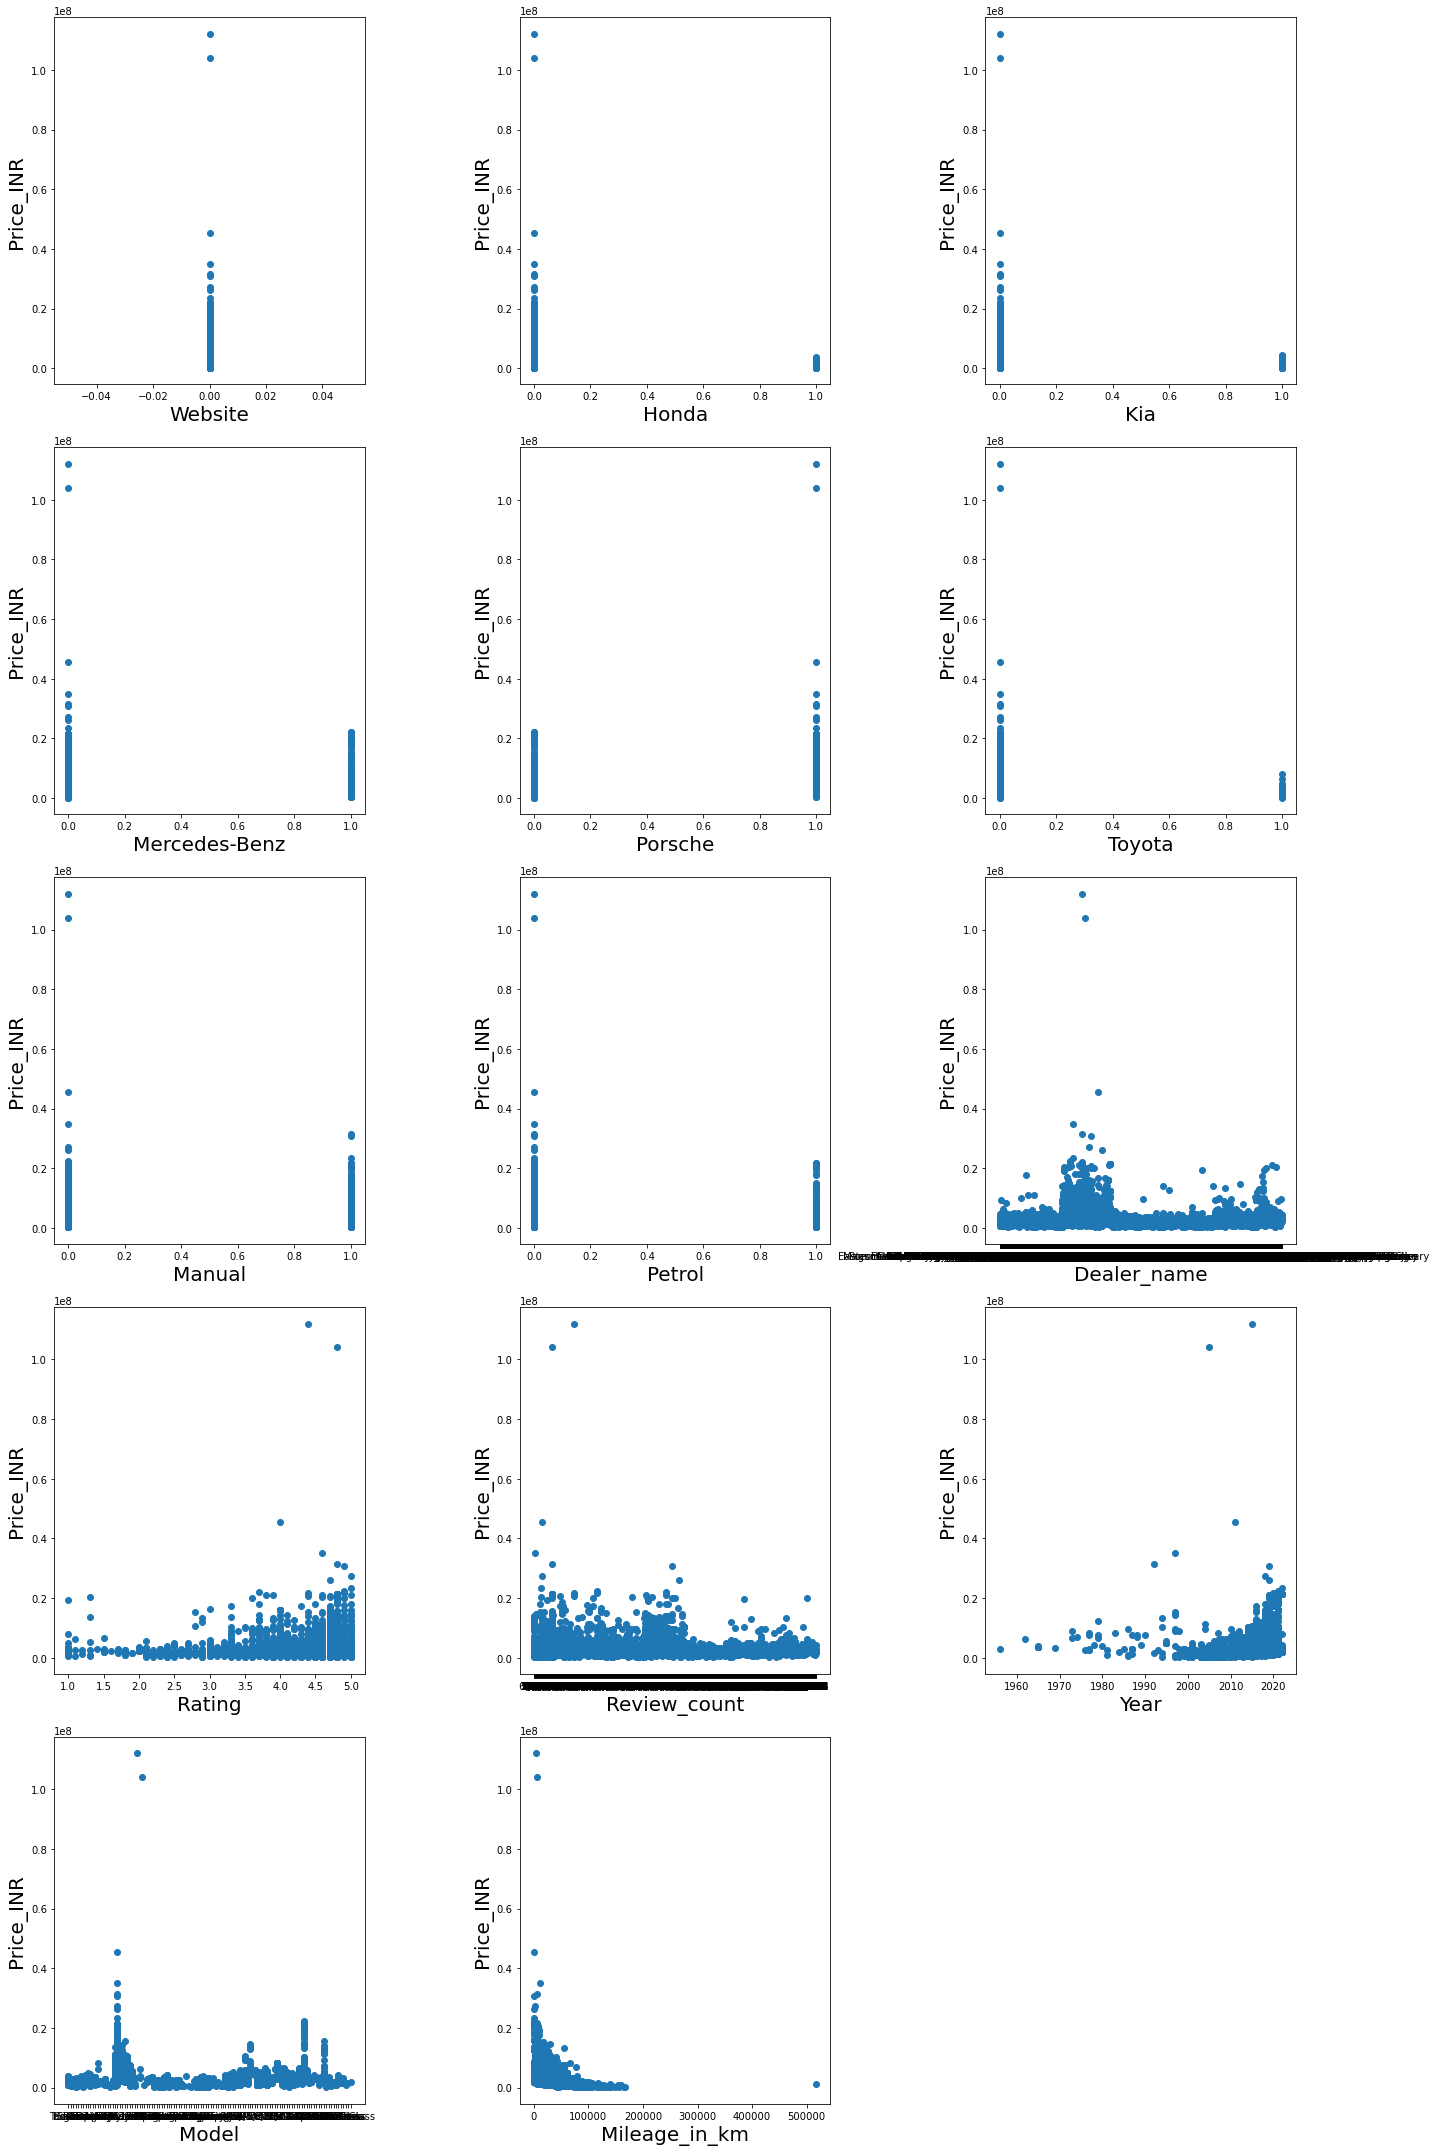

In [48]:
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for column in x:
    if plotnumber<=15:
        ax=plt.subplot(5,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Price_INR',fontsize=20)
    plotnumber+=1
plt.tight_layout()    

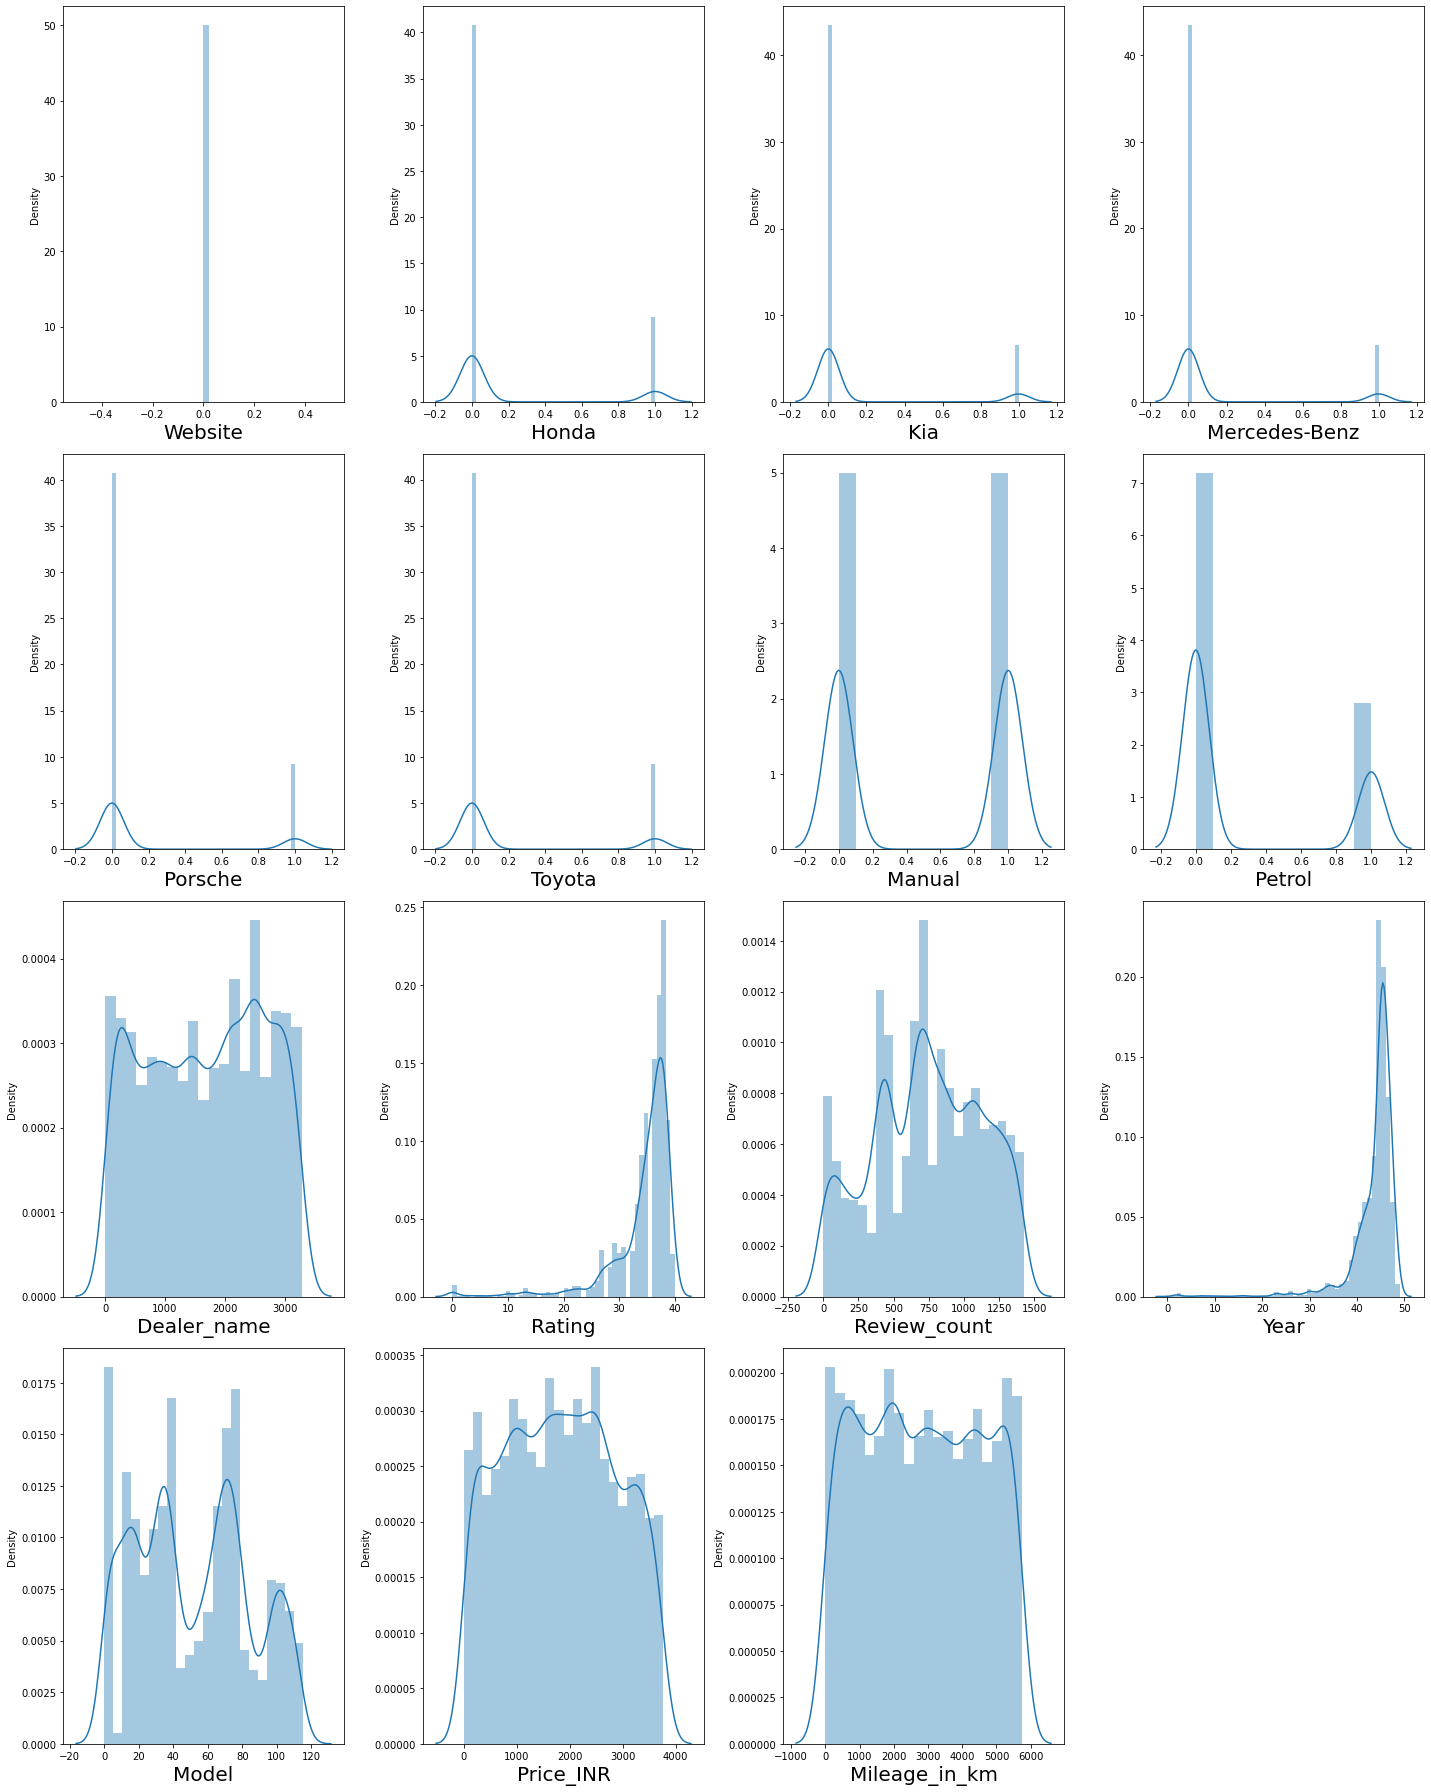

In [49]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in data1:
    if plotnumber<=16:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(data1[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()    

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [51]:
y1=data1['Price_INR']
x1=data1.drop(columns=['Price_INR'])

In [52]:
scaler=StandardScaler()
x1_scaled=scaler.fit_transform(x1)

In [53]:
x_train,x_test,y_train,y_test = train_test_split(x1_scaled,y1,test_size=0.25,random_state=355)

In [54]:
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [55]:
regression.score(x_train,y_train)

0.6981359439567197

In [56]:
regression.score(x_test,y_test)

0.7046309612016767

In [57]:
y_pred = regression.predict(x_test)

In [58]:
r2_score(y_test,y_pred)

0.7046309612016767

# Regularization Lasso and Ridge

In [59]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso,LassoCV,Ridge,RidgeCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
#LASSO Regularization
#lassocv will return best alpha and coefficient after performing 10 cross validations

lasscv = LassoCV(alphas=None,cv=10,max_iter=1000,normalize = True)
lasscv.fit(x_train,y_train)

LassoCV(cv=10, normalize=True)

In [61]:
alpha = lasscv.alpha_
alpha

0.016732977743392493

In [62]:
#now that we have best parameter,lets use Lasso Regression and see how well our data has fitted the model
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.016732977743392493)

In [63]:
lasso_reg.score(x_test,y_test)

0.7046300227064225

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [65]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x1_scaled,i) for i in range(x1_scaled.shape[1])]
vif["Features"] = x.columns

vif

,vif,Features
0,NaN,Website
1,1.724196,Honda
2,1.958641,Kia
3,1.545194,Mercedes-Benz
4,2.430026,Porsche
5,1.927761,Toyota
6,1.791057,Manual
7,2.391659,Petrol
8,1.054496,Dealer_name
9,1.025115,Rating


<AxesSubplot:>

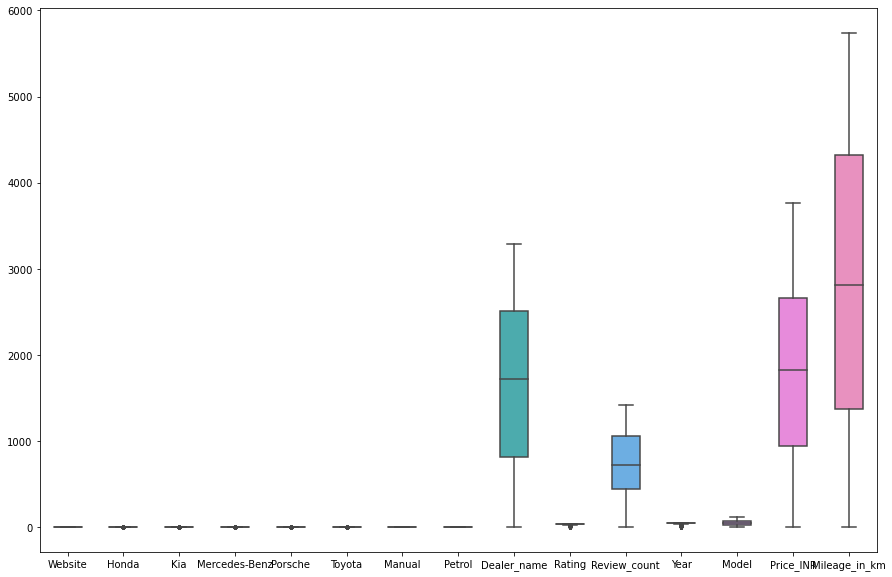

In [66]:
fig,ax=plt.subplots(figsize=(15,10))
sns.boxplot(data=data1,width = 0.5,ax=ax,fliersize=3)

# Random Forrest Regressor

In [67]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(x_train , y_train)

RandomForestRegressor()

In [68]:
y_pred = reg_rf.predict(x_test)

In [69]:
reg_rf.score(x_train , y_train)

0.9893176331970612

In [71]:
import pickle
car_prediction = 'finalized_model.pickle'
pickle.dump(reg_rf,open(car_prediction,'wb'))

In [72]:

scaler=StandardScaler()
x_scaled = scaler.fit_transform(x1)

In [73]:
loaded_model=pickle.load(open(car_prediction,'rb'))
a=loaded_model.predict(scaler.transform(x1))